In [11]:
import numpy as np
import pandas as pd
import glob
from pprint import pprint

pd.set_option('display.max_columns',None)

#Import Data
path = r'/homes/chh30/ECS784-PROJECT/sourcedata'
filenames = glob.glob(path+"/*.csv")

frame = pd.DataFrame

list = []

for file_ in filenames:
     df = pd.read_csv(file_,index_col=None,encoding = "ISO-8859-1",header=0)
     list.append(df)

frame = pd.concat(list,ignore_index=True,sort=False)

frame.head()
print(frame.shape)








(10216388, 15)


In [12]:
#Clean Data


##Drop records with null value
frame.dropna(axis=0, subset=["Rental Id",
                             "Bike Id",
                             "Start Date",
                             "StartStation Id",
                             "StartStation Name",
                             "End Date",
                             "EndStation Id",
                             "EndStation Name",
                             "Duration"], inplace=True)


## Extra drop for duplicates
frame.drop_duplicates(inplace=True)



##Formatting column
frame["Bike Id"] = frame["Bike Id"].astype(int)
frame["Rental Id"] = frame["Rental Id"].astype(int)
frame["EndStation Id"] = frame["EndStation Id"].astype(int)
frame["StartStation Id"] = frame["StartStation Id"].astype(int)
frame["EndStation Id"] = frame["EndStation Id"].astype(int)
frame["Duration"] = frame["Duration"].astype(int)

frame = frame[frame["StartStation Id"] != frame["EndStation Id"]]

frame.tail(10)







,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name,Unnamed: 9,Unnamed: 10,Unnamed: 11,EndStation Logical Terminal,endStationPriority_id,StartStation Logical Terminal
10216377,53959330,1380,14020,18/05/2016 00:19,320,"Queen Mother Sports Centre, Victoria",17/05/2016 23:56,407,"Speakers' Corner 1, Hyde Park",NaN,NaN,NaN,NaN,NaN,NaN
10216378,53959329,480,1559,18/05/2016 00:04,544,"Percival Street, Finsbury",17/05/2016 23:56,331,"Bunhill Row, Moorgate",NaN,NaN,NaN,NaN,NaN,NaN
10216379,53959326,480,5496,18/05/2016 00:04,364,"Alfred Place, Bloomsbury",17/05/2016 23:56,4,"St. Chad's Street, King's Cross",NaN,NaN,NaN,NaN,NaN,NaN
10216380,53959333,360,3076,18/05/2016 00:03,317,"Dickens Square, Borough",17/05/2016 23:57,815,"Lambeth Palace Road, Waterloo",NaN,NaN,NaN,NaN,NaN,NaN
10216381,53959337,480,10291,18/05/2016 00:05,744,"Ingrave Street, Clapham Junction",17/05/2016 23:57,670,"Ashley Crescent, Battersea",NaN,NaN,NaN,NaN,NaN,NaN
10216382,53959334,1380,7802,18/05/2016 00:20,520,"Bancroft Road, Bethnal Green",17/05/2016 23:57,486,"Granby Street, Shoreditch",NaN,NaN,NaN,NaN,NaN,NaN
10216383,53959335,300,7029,18/05/2016 00:02,202,"Leman Street, Aldgate",17/05/2016 23:57,206,"New Road 1 , Whitechapel",NaN,NaN,NaN,NaN,NaN,NaN
10216384,53959332,300,1392,18/05/2016 00:02,202,"Leman Street, Aldgate",17/05/2016 23:57,206,"New Road 1 , Whitechapel",NaN,NaN,NaN,NaN,NaN,NaN
10216385,53959336,420,12896,18/05/2016 00:04,210,"Hinde Street, Marylebone",17/05/2016 23:57,188,"Nutford Place, Marylebone",NaN,NaN,NaN,NaN,NaN,NaN
10216387,53959338,420,10765,18/05/2016 00:06,626,"Normand Park, West Kensington",17/05/2016 23:59,666,"Olympia Way, Olympia",NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
##Grab the column we need
frame = frame.loc[:,('Start Date',
                           'StartStation Id',
                           'StartStation Name',
                           #'End Date',
                           #'EndStation Id',
                           'Duration')]

frame.tail(10)


,Start Date,StartStation Id,StartStation Name,Duration
10216377,17/05/2016 23:56,407,"Speakers' Corner 1, Hyde Park",1380
10216378,17/05/2016 23:56,331,"Bunhill Row, Moorgate",480
10216379,17/05/2016 23:56,4,"St. Chad's Street, King's Cross",480
10216380,17/05/2016 23:57,815,"Lambeth Palace Road, Waterloo",360
10216381,17/05/2016 23:57,670,"Ashley Crescent, Battersea",480
10216382,17/05/2016 23:57,486,"Granby Street, Shoreditch",1380
10216383,17/05/2016 23:57,206,"New Road 1 , Whitechapel",300
10216384,17/05/2016 23:57,206,"New Road 1 , Whitechapel",300
10216385,17/05/2016 23:57,188,"Nutford Place, Marylebone",420
10216387,17/05/2016 23:59,666,"Olympia Way, Olympia",420


In [79]:
# Missing data checking

missing_data = frame.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Start Date
False    8966926
Name: Start Date, dtype: int64

StartStation Id
False    8966926
Name: StartStation Id, dtype: int64

StartStation Name
False    8966926
Name: StartStation Name, dtype: int64

Duration
False    8966926
Name: Duration, dtype: int64



In [80]:
import matplotlib.pyplot as plt
%matplotlib inline

frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8966926 entries, 0 to 10216387
Data columns (total 4 columns):
Start Date           object
StartStation Id      int64
StartStation Name    object
Duration             int64
dtypes: int64(2), object(2)
memory usage: 342.1+ MB


In [93]:
#frame.groupby(['StartStation Name','StartStation Id']).size().reset_index(name='Rental_Counts').nlargest(5,columns='Rental_Counts').tail(5)

    

,StartStation Name,StartStation Id,Rental_Counts
59,"Belgrove Street , King's Cross",14,89082
763,"Waterloo Station 3, Waterloo",154,72753
761,"Waterloo Station 1, Waterloo",374,54451
364,"Hyde Park Corner, Hyde Park",191,46861
799,"Wormwood Street, Liverpool Street",217,44929


In [82]:
#For single station use
#singleStationData = frame[frame['StartStation Id']==14]

#For all station use
singleStationData = frame

singleStationData.info()
singleStationData.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8966926 entries, 0 to 10216387
Data columns (total 4 columns):
Start Date           object
StartStation Id      int64
StartStation Name    object
Duration             int64
dtypes: int64(2), object(2)
memory usage: 342.1+ MB


,Start Date,StartStation Id,StartStation Name,Duration
0,28/12/2016 10:35,14,"Belgrove Street , King's Cross",780
1,28/12/2016 16:17,71,"Newgate Street , St. Paul's",600
3,31/12/2016 10:52,723,"Stephendale Road, Sands End",300
4,30/12/2016 17:33,723,"Stephendale Road, Sands End",240
5,29/12/2016 17:11,358,"High Holborn , Covent Garden",600


In [83]:
#import datetime
#singleStationData["Start Date"]= pd.to_datetime(singleStationData["Start Date"],dayfirst=True, errors='raise') 
#singleStationData["End Date"]= pd.to_datetime(singleStationData["End Date"], dayfirst=True, yearfirst=False errors='ignore') 
#singleStationData["Month"]=pd.to_datetime(singleStationData["Start Date"]).dt.month

singleStationData['Start Date'] = pd.to_datetime(singleStationData['Start Date'],format='%d/%m/%Y %H:%M',dayfirst=True)


singleStationData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8966926 entries, 0 to 10216387
Data columns (total 4 columns):
Start Date           datetime64[ns]
StartStation Id      int64
StartStation Name    object
Duration             int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 342.1+ MB


In [86]:
#import datetime as dt
import holidays
#Clean Data out of year range
begin = pd.Timestamp('2016-01-01 00:00:00')
end = pd.Timestamp('2016-12-31 23:59:59')
mask=(singleStationData['Start Date'] >= begin)&(singleStationData['Start Date'] <= end)
singleStationData = singleStationData.loc[mask]

singleStationData.info()


singleStationData['YearMonth'] = singleStationData['Start Date'].map(lambda x: 100*x.year+x.month)
singleStationData['DateHour'] = pd.to_datetime(singleStationData['Start Date'].apply(lambda x: x.strftime('%Y-%m-%d %H:00')),format='%Y-%m-%d %H:%M',dayfirst=True)



singleStationData['Hour'] = singleStationData['Start Date'].map(lambda x: x.hour)
singleStationData['DayOfWeek'] = singleStationData['Start Date'].dt.dayofweek.astype(int) #0=Monday,1=Tuesday
singleStationData['Weekend'] = ((singleStationData['Start Date'].dt.dayofweek)// 5==1)

singleStationData.info()


#df2 = singleStationData['Start Date'].groupby([singleStationData['Start Date'].dt.year,singleStationData['Start Date'].dt.month]).agg({'count'})

#df2.info()
#path = r'/homes/chh30/ECS784-PROJECT/exportCSV.csv'

#df2.to_csv(path,index=False)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8933783 entries, 0 to 10216387
Data columns (total 8 columns):
Start Date           datetime64[ns]
StartStation Id      int64
StartStation Name    object
Duration             int64
DateHour             datetime64[ns]
Hour                 int64
DayOfWeek            int64
Weekend              bool
dtypes: bool(1), datetime64[ns](2), int64(4), object(1)
memory usage: 553.8+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8933783 entries, 0 to 10216387
Data columns (total 9 columns):
Start Date           datetime64[ns]
StartStation Id      int64
StartStation Name    object
Duration             int64
DateHour             datetime64[ns]
Hour                 int64
DayOfWeek            int64
Weekend              bool
YearMonth            int64
dtypes: bool(1), datetime64[ns](2), int64(5), object(1)
memory usage: 622.0+ MB


In [87]:

#df1 = singleStationData.groupby(['Start Date','Hour','DayOfWeek','Weekend']).size().reset_index(name=['MonthlyRental']).nlargest(20,columns='MonthlyRental').tail(20).sort_values(by='YearMonth',ascending=True)
#data = singleStationData.groupby(['DateHour','Hour','DayOfWeek','Weekend'])['DateHour'].sum()
#data.head(10)

#df1 = singleStationData.groupby('DateHour')['Hour','DayOfWeek','Weekend'].size().reset_index(name=['RentalCount']).nlargest(20,columns='RentalCount').tail(20).sort_values(by='YearMonth',ascending=True)


#GroupBy Y/M/D Hour period
df1 = singleStationData.groupby(['DateHour','Hour','DayOfWeek','Weekend']).size().reset_index(name='HourlyCount')
#df1['count'] = df1['DateHour'].map(singleStationData['DateHour'].value_counts())
df1.sort_values('DateHour',ascending=True)
df1.tail(5)                     



#Month Rental Group by Month
#df2 = singleStationData.groupby(['YearMonth']).size().reset_index(name='MonthlyRental').nlargest(20,columns='MonthlyRental').tail(20).sort_values(by='YearMonth',ascending=True)
#df2
#Hourly Rental Group by Hour

#df3 = singleStationData.groupby(['Hour']).size().reset_index(name='HourlyRental').nlargest(20,columns='HourlyRental').tail(20).sort_values(by='Hour',ascending=True)
#df3

,DateHour,Hour,DayOfWeek,Weekend,HourlyCount
8394,2016-12-31 19:00:00,19,5,True,390
8395,2016-12-31 20:00:00,20,5,True,362
8396,2016-12-31 21:00:00,21,5,True,341
8397,2016-12-31 22:00:00,22,5,True,397
8398,2016-12-31 23:00:00,23,5,True,457


In [92]:
#Export YMDHour period
YMDHourExportPath = r'/homes/chh30/ECS784-PROJECT/Export_Data/YMDHourRental2016.csv'
df1.to_csv(YMDHourExportPath,index=False)

#Export Weekday/Weekend
WeekendExportPath = r'/homes/chh30/ECS784-PROJECT/Export_Data/WeekendRental2016.csv'
dfWeekend = df1[df1['Weekend']==True]
dfWeekend.to_csv(WeekendExportPath,index=False)



WeekdayExportPath = r'/homes/chh30/ECS784-PROJECT/Export_Data/WeekdayRental2016.csv'
dfWeekday = df1[df1['Weekend']==False]
dfWeekday.to_csv(WeekdayExportPath,index=False)

#Export MonthlyRental CSV
#MonthExportPath = r'/homes/chh30/ECS784-PROJECT/Export_Data/MonthlyRental2016.csv'
#df2.to_csv(MonthExportPath,index=False)

#Export HourlyRental CSV
#HourlyExportPath= r'/homes/chh30/ECS784-PROJECT/Export_Data/HourlyRental2016.csv'
#df3.to_csv(HourlyExportPath,index=False)

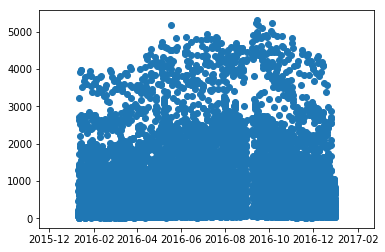

In [95]:
import scipy as sp
import matplotlib.pyplot as plt


Xi = np.array(df1['DateHour'])
Yi = np.array(df1['HourlyCount'])
plt.scatter(Xi,Yi)
plt.show()

trainxi=np.ones((Xi.shape[0],2))
trainxi[:,0]=Xi

trainyi=np.zerps((Xi.shape[0],1))
trainyi[:,0]=Yi
